In [45]:
import pandas as pd
import os
import numpy as np
%load_ext autoreload
%autoreload 2
import pipeline as pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11, 4)})

## Reading the Data

In [9]:
cd ..

/Users/deniztokmakoglu/CAPP30254_Project


In [10]:
def read_data():
    claims_datas = [f"claims_{i}" for i in range(1, 6)]
    claims = pd.read_csv("Data/claims1.csv")
    for i in range(2, 6):
        claims = claims.append(pd.read_csv(f"Data/claims{i}.csv"))
    return claims

In [11]:
claims = read_data()

## Data Preperation

In [14]:
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])
claims["log(reimb2010+1)"] = np.array(claims["reimb2010"]) + 1
claims["log(reimb2010+1)"] = np.log10(claims["log(reimb2010+1)"])
claims["log(reimb2009+1)"] = np.array(claims["reimb2009"]) + 1
claims["log(reimb2009+1)"] = np.log10(claims["log(reimb2009+1)"])
claims["log(reimb2008+1)"] = np.array(claims["reimb2008"]) + 1
claims["log(reimb2008+1)"] = np.log10(claims["log(reimb2008+1)"])

In [26]:
claims["race"] = claims["race"].str.replace("Block", "Black")

In [27]:
claims = claims.drop(columns = ["Unnamed: 0"])

KeyError: "['Unnamed: 0'] not found in axis"

In [33]:
claims = pipeline.onehot(claims, ["race"])

In [34]:
train, test = pipeline.train_test(claims, 0.2, random_ = 5597)

In [35]:
pipeline.fill_all_missing(claims)

In [36]:
cols_norm = ["reimb2010", "reimb2008", "reimb2009", 
             "acuity", "costTrend", "monthsWithClaims", 
             "log(reimb2009+1)", "log(reimb2010+1)", "log(reimb2008+1)"]

In [37]:
train_n, test_n = pipeline.normalize(train, test, cols_norm)

## Bivariate Linear Regressions

### Baseline (Predicting Using 2010 Costs, Using 2009)

In [78]:
baseline_reg_2009, best_line_2009 = pipeline.linreg(train_n, test_n, train, test, "log(reimb2009+1)", "log(reimb2010+1)")

This ML model took 0.03227686882019043 to train
The MAE is 0.5994799489786279
The MSE is 0.723846735326684
The R^2 value is 0.5358440478479367


In [82]:
claims_s_2009 = claims.sample(round(len(claims)*0.001))

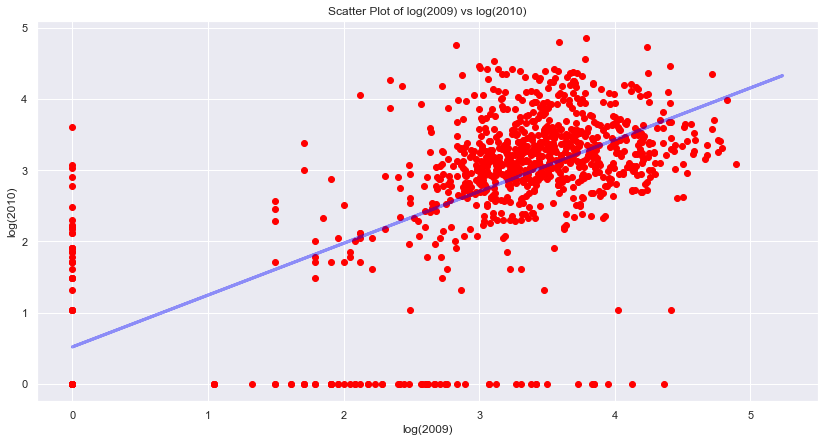

In [83]:
plt.figure(figsize=(14,7))
x = claims_s_2009["log(reimb2009+1)"]
x_test = test["log(reimb2009+1)"]
y = claims_s_2009["log(reimb2010+1)"]
plt.plot(x, y, '.', color='red', markersize=12)
plt.plot(np.array(x_test), best_line_2009, color='blue', alpha=0.4, linewidth=3)
plt.title("Scatter Plot of log(2009) vs log(2010)")
plt.xlabel("log(2009)")
plt.ylabel("log(2010)")
plt.show()

### Baseline 2 (Predicting Using 2010 Costs, Using 2008)

In [86]:
baseline_reg_2008, best_line_2008 = pipeline.linreg(train_n, test_n, train, test, "log(reimb2008+1)", "log(reimb2010+1)")

This ML model took 0.029864788055419922 to train
The MAE is 0.6322172573832757
The MSE is 0.7625834286521391
The R^2 value is 0.5110047194428918


In [97]:
claims_s_2008 = claims.sample(round(len(claims)*0.001))

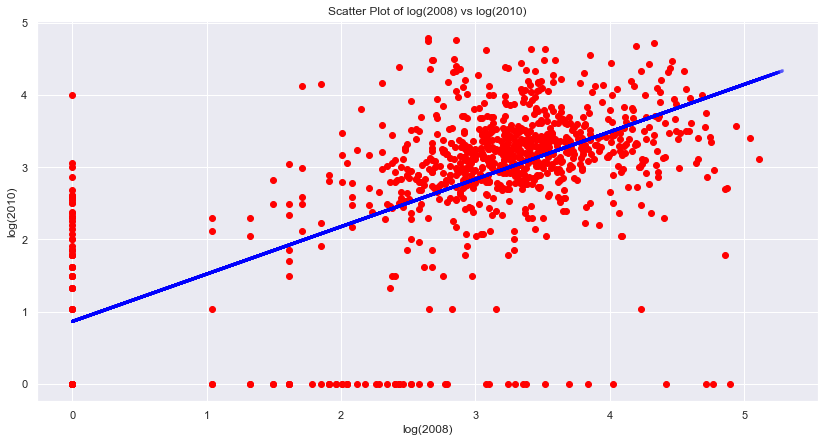

In [98]:
plt.figure(figsize=(14,7))
x = claims_s_2008["log(reimb2008+1)"]
x_test = test["log(reimb2008+1)"]
y = claims_s_2008["log(reimb2010+1)"]
plt.plot(x, y, '.', color='red', markersize=12)
plt.plot(np.array(x_test), best_line_2008, color='blue', alpha=0.4, linewidth=3)
plt.title("Scatter Plot of log(2008) vs log(2010)")
plt.xlabel("log(2008)")
plt.ylabel("log(2010)")
plt.show()